In [1]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import scipy.stats as stats
import pylab
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import math
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Roboto']
from matplotlib.colors import ListedColormap
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

col = ['#5052c7', '#1c84b3', '#0fb390', '#f09816', '#fb3856', '#41429f', '#166a8f', '#0b9072', '#c07a12', '#c92d45']

/Users/magtanggoldg/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [80]:
def plot_LR(x):
    ##Helper function to convert to sigmoid function
    return 1/(1+np.exp(-x))

def plot_decision_region(X, y, classifier, resolution = 0.02, decRegion=True):
    """"
    Description: Given a classification model, plot the points with the decision boundaries
    IMPORTRANT: Works for only 2 independent variables, given 1 dependent
    
    Parameters:
        X (n x 2): dataframe of two variables
        y (n x 1): dataframe of the dependent variable
        classifier: fitted model
        resolution: [Optional] How detailed the line will be. Smaller will make it more detailed, but run slower
        decRegion: [Optional, Default is True] Plot decRegion or not. 
        
    Returns:
        Plot with decision regions
    """
    
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = col
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize = (10,10))
    
    if decRegion == True:
        plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap=cmap)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl].iloc[:,0], 
                   y=X[y==cl].iloc[:,1],
                   alpha = 0.8, 
                   c = colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
        
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.legend()
    plt.show()
    
        
def plot_scatter_2d(df, x1, x2, y):
    """"
    Description: Plots a scatter plot of two dependent variables, with different color/shape per class
    IMPORTRANT: Works for only 2 independent variables, given 1 dependent
    
    Parameters:
        df(n x m): dataframe containing variables of interest
        x1 (string): name of x-axis variable
        x2 (string): name of y-axis variable
        y (string): name of labels
        
    Returns:
        Scatter plot
    """
    f, ax = plt.subplots(1)
    for idx, cl in enumerate(np.unique(df[y])):
        
        ax.scatter(x=df[df[y]==cl][x1], 
                   y=df[df[y]==cl][x2],
                   c = col[idx],
                   label=cl)
        
    plt.show()
    
def plot_me(df, y):
    """
    Description: Compares the population of all variables in a dataframe against a set label
    
    Parameters:
        df(n x m): dataframe containing variables of interest
        y (string): name of labels   
        
    Returns:
        Stacked 100% Bar charts of crosstabs of all variables againt the Y variable
    
    """
    labels = df[y]
    new_df = df.drop(y, axis = 1)
    
    plots = new_df.shape[1]
    columns = 3
    rows = math.ceil(plots/columns)
    
    f,ax = plt.subplots(rows, columns, figsize = (20,20))
    for i in range(plots):
        temp_row = new_df.iloc[:,i]
        if len(temp_row.unique()) > 5:
            temp_row = pd.cut(temp_row, 5)
        
        pd.crosstab(labels, temp_row, normalize='index').plot(kind='bar', stacked=True, ax= ax[int(i/columns), i%columns], color = col)
        ax[int(i/columns), i%columns].set_title(new_df.columns[i])
        
    plt.tight_layout()
    plt.show()


def get_rocCurve(Y_actual, Y_predict):
    """
    Description: Plots the ROC Curve given the actual vs predicted values
    
    Parameters:
        Y_actual: True labels
        Y_predict: prediction PROBABILITIES given an X feature set
        
    Returns:
        ROC Curve
    
    """
    from sklearn.metrics import roc_curve, auc
    # Compute ROC curve and ROC area for each class

    fpr, tpr, _ = roc_curve(Y_actual, Y_predict)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color=col[4],
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color=col[1], lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
def get_conf(Y_actual, Y_predict):
    """
    Description: Calculate the model accuracy metrics given actuals vs predicted
    
    Parameters:
        Y_actual: True labels
        Y_predict: prediction LABELS given an X feature set
        
    Returns:
        number of true positive, true negative, false positive, false negative
        Accuracy
        True Positive Rate/Recall
        True Negative Rate
        Precision
        F1 Score
    
    """
    trial = pd.DataFrame([Y_actual,Y_predict]).T
    trial.columns = [0, 1]
    trial['lol'] = abs(trial[0]-trial[1])

    print(trial)
    tp = trial[(trial[0]==1.0)&(trial[1]==1.0)].shape[0]
    tn = trial[(trial[0]==0.0)&(trial[1]==0.0)].shape[0]
    fp = trial[(trial[0]==0.0)&(trial[1]==1.0)].shape[0]
    fn = trial[(trial[0]==1.0)&(trial[1]==0.0)].shape[0]
    print(tp, tn, fp, fn)
    accuracy = (tp+tn)/(tp+tn+fn+fp)
    tpr = tp/(tp+fn)
    tnr = tn/(fp+tn)
    precision = tp/(fp+tp)
    f1 = (2*tpr*precision)/(precision+tpr)
    
    return({'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn, 'acc':accuracy, 'tpr':tpr, 'tnr':tnr, 'precision':precision, 'f1':f1})


def show_tree(tree, x_labels):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,
                    feature_names=x_labels)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())


def plot_feat_imp(tree, X):
    feat_importance = {}
    impt = tree.feature_importances_
    feats = X.columns
    for i in range(len(impt)):
        feat_importance[feats[i]] = impt[i]

    pd.DataFrame({'feat_impt':feat_importance}).sort_values(by = 'feat_impt').plot(kind = 'barh', figsize = (10,10), color = col[0])
    plt.title('Feature Importances from Titanic Decision Tree')
    plt.show()
    

In [165]:
df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/default_data.csv')
df = df.drop('ID', axis = 1)
df.EDUCATION = df.EDUCATION.apply(lambda x: 4 if x>=4 or x==0 else x)
educ_conv = {1.0: 'Graduate', 2.0: 'University', 3.0:'High School', 4.0: 'Others'}
df.EDUCATION = df.EDUCATION.apply(lambda x: educ_conv.get(x))
df.MARRIAGE = df.MARRIAGE.apply(lambda x: {1.0:'Married', 2.0:'Single', 3.0:'Others'}.get(x))
#df.SEX = df.SEX.apply(lambda x: 'Male' if x == 2 else 'Female' )
df = pd.concat([df.drop('EDUCATION', axis = 1), pd.get_dummies(df.EDUCATION).drop('Others', axis = 1)], axis = 1)
df = pd.concat([df.drop('MARRIAGE', axis = 1), pd.get_dummies(df.MARRIAGE).drop('Others', axis = 1)], axis = 1)

In [53]:
df.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Graduate,High School,University,Married,Single
0,20000.0,2.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,...,0.0,0.0,0.0,0.0,1.0,0,0,1,1,0
1,120000.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,1000.0,1000.0,0.0,2000.0,1.0,0,0,1,0,1
2,90000.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,1000.0,1000.0,1000.0,5000.0,0.0,0,0,1,0,1
3,50000.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,1200.0,1100.0,1069.0,1000.0,0.0,0,0,1,1,0
4,50000.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,...,10000.0,9000.0,689.0,679.0,0.0,0,0,1,1,0


In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('default payment next month', axis = 1), df['default payment next month'], test_size = 0.2)

In [167]:
#Fit Logistic Regression Model

logit_model=sm.Logit(Y_train,X_train[['Graduate', 'High School', 'University', 'Married', 'Single', 'LIMIT_BAL', 'SEX', 'AGE']])
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.514868
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                24000
Model:                                  Logit   Df Residuals:                    23992
Method:                                   MLE   Df Model:                            7
Date:                        Sat, 29 Sep 2018   Pseudo R-squ.:                 0.02683
Time:                                02:54:03   Log-Likelihood:                -12357.
converged:                               True   LL-Null:                       -12697.
                                                LLR p-value:                7.350e-143
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Graduate        0.2348      0.107      2.187      0.029       0.024       0.445
High School     0.2492      0.111      2.245      0.025       0.032       0.467
University      0.2470      0.105      2.352      0.019       0.041       0.453
Married        -0.4003      0.102     -3.939      0.000      -0.600      -0.201
Single         -0.6695      0.098     -6.835      0.000      -0.861      -0.478
LIMIT_BAL   -3.384e-06   1.49e-07    -22.686      0.000   -3.68e-06   -3.09e-06
SEX            -0.2415      0.031     -7.861      0.000      -0.302      -0.181
AGE            -0.0015      0.002     -0.817      0.414      -0.005       0.002
===============================================================================
"""

In [168]:
np.exp(result.params)

Graduate       1.264630
High School    1.282998
University     1.280155
Married        0.670085
Single         0.511958
LIMIT_BAL      0.999997
SEX            0.785445
AGE            0.998539
dtype: float64

In [169]:
predictions = result.predict(X_train[['Graduate', 'High School', 'University', 'Married', 'Single', 'LIMIT_BAL', 'SEX', 'AGE']])>0.4
sum(predictions == Y_train)/len(Y_train)

0.7765416666666667

In [170]:
Y_train.value_counts()/sum(Y_train.value_counts())

0.0    0.778292
1.0    0.221708
Name: default payment next month, dtype: float64

In [171]:
get_conf(Y_train, predictions)

         0    1  lol
3974   0.0  0.0  0.0
2688   1.0  0.0  1.0
13707  0.0  0.0  0.0
28826  0.0  0.0  0.0
14956  0.0  0.0  0.0
13854  1.0  0.0  1.0
13630  0.0  0.0  0.0
28330  0.0  0.0  0.0
23409  0.0  0.0  0.0
29098  0.0  0.0  0.0
11295  1.0  0.0  1.0
23932  0.0  0.0  0.0
20696  0.0  0.0  0.0
23881  0.0  0.0  0.0
3518   0.0  0.0  0.0
28052  1.0  0.0  1.0
14084  1.0  0.0  1.0
10250  0.0  0.0  0.0
733    0.0  0.0  0.0
19308  0.0  0.0  0.0
10205  0.0  0.0  0.0
21390  0.0  0.0  0.0
8933   0.0  0.0  0.0
13020  1.0  0.0  1.0
18814  0.0  0.0  0.0
9084   1.0  0.0  1.0
5316   1.0  0.0  1.0
7846   1.0  0.0  1.0
9763   0.0  0.0  0.0
24152  0.0  0.0  0.0
...    ...  ...  ...
12817  0.0  0.0  0.0
8201   0.0  0.0  0.0
485    0.0  0.0  0.0
7012   0.0  0.0  0.0
9229   0.0  0.0  0.0
17822  0.0  0.0  0.0
17023  1.0  0.0  1.0
26797  0.0  0.0  0.0
25657  0.0  0.0  0.0
12021  1.0  0.0  1.0
12509  0.0  0.0  0.0
25692  0.0  0.0  0.0
6507   0.0  0.0  0.0
2743   0.0  0.0  0.0
2849   0.0  1.0  1.0
19416  1.0  0

{'acc': 0.7765416666666667,
 'f1': 0.013973156830299687,
 'fn': 5283,
 'fp': 80,
 'precision': 0.3220338983050847,
 'tn': 18599,
 'tnr': 0.9957171154772739,
 'tp': 38,
 'tpr': 0.007141514752866003}

In [97]:
#Fit Logistic Regression Model

logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.464229
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                24000
Model:                                  Logit   Df Residuals:                    23974
Method:                                   MLE   Df Model:                           25
Date:                        Sat, 29 Sep 2018   Pseudo R-squ.:                  0.1185
Time:                                02:32:47   Log-Likelihood:                -11142.
converged:                               True   LL-Null:                       -12639.
                                                LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
LIMIT_BAL   -6.728e-07   1.77e-07     -3.805      0.000   -1.02e-06   -3.26e-07
SEX            -0.1828      0.033     -5.590      0.000      -0.247      -0.119
AGE            -0.0029      0.002     -1.495      0.135      -0.007       0.001
PAY_0           0.5711      0.020     28.871      0.000       0.532       0.610
PAY_2           0.0839      0.023      3.714      0.000       0.040       0.128
PAY_3           0.0550      0.025      2.164      0.030       0.005       0.105
PAY_4           0.0186      0.028      0.661      0.508      -0.036       0.074
PAY_5           0.0478      0.030      1.584      0.113      -0.011       0.107
PAY_6           0.0167      0.025      0.673      0.501      -0.032       0.065
BILL_AMT1   -7.122e-06   1.34e-06     -5.331      0.000   -9.74e-06    -4.5e-06
BILL_AMT2    3.804e-06    1.7e-06      2.234      0.025    4.66e-07    7.14e-06
BILL_AMT3    1.276e-06   1.45e-06      0.877      0.380   -1.58e-06    4.13e-06
BILL_AMT4    -8.43e-07   1.53e-06     -0.552      0.581   -3.84e-06    2.15e-06
BILL_AMT5    1.369e-06   1.69e-06      0.808      0.419   -1.95e-06    4.69e-06
BILL_AMT6    4.662e-07   1.33e-06      0.349      0.727   -2.15e-06    3.08e-06
PAY_AMT1    -1.322e-05   2.48e-06     -5.333      0.000   -1.81e-05   -8.36e-06
PAY_AMT2    -7.758e-06   2.17e-06     -3.581      0.000    -1.2e-05   -3.51e-06
PAY_AMT3    -2.197e-06   1.85e-06     -1.189      0.234   -5.82e-06    1.42e-06
PAY_AMT4    -6.535e-06    2.2e-06     -2.974      0.003   -1.08e-05   -2.23e-06
PAY_AMT5    -4.923e-06   2.17e-06     -2.273      0.023   -9.17e-06   -6.78e-07
PAY_AMT6    -2.779e-06   1.51e-06     -1.841      0.066   -5.74e-06    1.79e-07
Graduate        0.1487      0.117      1.275      0.202      -0.080       0.377
High School     0.0533      0.121      0.441      0.659      -0.183       0.290
University      0.0679      0.114      0.594      0.552      -0.156       0.292
Married        -0.5838      0.109     -5.363      0.000      -0.797      -0.370
Single         -0.8526      0.105     -8.097      0.000      -1.059      -0.646
===============================================================================
"""

In [99]:
predictions = result.predict(X_train)>0.5
sum(predictions == Y_train)/len(Y_train)

0.8110833333333334

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Graduate,High School,University,Married,Single
0,20000.0,2.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,...,0.0,0.0,0.0,0.0,1.0,0,0,1,1,0
1,120000.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,...,1000.0,1000.0,0.0,2000.0,1.0,0,0,1,0,1
2,90000.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,...,1000.0,1000.0,1000.0,5000.0,0.0,0,0,1,0,1
3,50000.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,...,1200.0,1100.0,1069.0,1000.0,0.0,0,0,1,1,0
4,50000.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,...,10000.0,9000.0,689.0,679.0,0.0,0,0,1,1,0
5,50000.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,64400.0,...,657.0,1000.0,1000.0,800.0,0.0,1,0,0,0,1
6,500000.0,1.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,367965.0,...,38000.0,20239.0,13750.0,13770.0,0.0,1,0,0,0,1
7,100000.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,11876.0,...,0.0,581.0,1687.0,1542.0,0.0,0,0,1,0,1
8,140000.0,2.0,28.0,0.0,0.0,2.0,0.0,0.0,0.0,11285.0,...,432.0,1000.0,1000.0,1000.0,0.0,0,1,0,1,0
9,20000.0,1.0,35.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,0.0,...,0.0,13007.0,1122.0,0.0,0.0,0,1,0,0,1


In [163]:
u = np.random.randint(0, df.shape[0], 10)
df_tree = df[['SEX', 'MARRIAGE', 'default payment next month']].iloc[u, :]
df_tree

,SEX,MARRIAGE,default payment next month
29946,Female,Single,0.0
24212,Female,Single,0.0
15765,Male,Single,1.0
15265,Male,Married,0.0
12289,Female,Single,0.0
29880,Female,Married,1.0
22686,Male,Single,1.0
26666,Female,Single,0.0
16003,Male,Married,0.0
5237,Female,Married,0.0


In [164]:
print(df_tree[df_tree.SEX == 'Male']['default payment next month'].value_counts())
print(df_tree[df_tree.SEX == 'Female']['default payment next month'].value_counts())
print('------')
print(df_tree[df_tree.MARRIAGE == 'Married']['default payment next month'].value_counts())
print(df_tree[df_tree.MARRIAGE == 'Single']['default payment next month'].value_counts())

0.0    2
1.0    2
Name: default payment next month, dtype: int64
0.0    5
1.0    1
Name: default payment next month, dtype: int64
------
0.0    3
1.0    1
Name: default payment next month, dtype: int64
0.0    4
1.0    2
Name: default payment next month, dtype: int64


In [184]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier()
dt.fit(X_train, Y_train)

sum(dt.predict(X_train) == Y_train)/len(Y_train)

0.979625

In [185]:
sum(dt.predict(X_test) == Y_test)/len(Y_test)

0.7981666666666667

In [187]:
get_conf(Y_test, dt.predict(X_test))

         0    1  lol
12826  0.0  NaN  NaN
3052   0.0  1.0  1.0
12991  0.0  NaN  NaN
13644  0.0  NaN  NaN
22295  0.0  NaN  NaN
29216  0.0  NaN  NaN
13281  1.0  NaN  NaN
27947  0.0  NaN  NaN
2291   0.0  0.0  0.0
22722  0.0  NaN  NaN
17506  0.0  NaN  NaN
17008  0.0  NaN  NaN
24549  0.0  NaN  NaN
230    0.0  1.0  1.0
26010  0.0  NaN  NaN
27274  0.0  NaN  NaN
27441  1.0  NaN  NaN
3116   0.0  0.0  0.0
6207   0.0  NaN  NaN
15462  0.0  NaN  NaN
22349  0.0  NaN  NaN
8873   0.0  NaN  NaN
28592  0.0  NaN  NaN
21193  0.0  NaN  NaN
11927  0.0  NaN  NaN
22898  0.0  NaN  NaN
21261  0.0  NaN  NaN
18884  0.0  NaN  NaN
27619  1.0  NaN  NaN
13051  0.0  NaN  NaN
...    ...  ...  ...
18845  1.0  NaN  NaN
15074  0.0  NaN  NaN
5181   0.0  0.0  0.0
9793   0.0  NaN  NaN
12691  0.0  NaN  NaN
20272  1.0  NaN  NaN
24140  0.0  NaN  NaN
7933   0.0  NaN  NaN
25678  1.0  NaN  NaN
3689   0.0  0.0  0.0
24451  1.0  NaN  NaN
7476   1.0  NaN  NaN
27102  0.0  NaN  NaN
2621   0.0  0.0  0.0
2649   0.0  0.0  0.0
7678   0.0  N

{'acc': 0.7256637168141593,
 'f1': 0.13670886075949368,
 'fn': 216,
 'fp': 125,
 'precision': 0.17763157894736842,
 'tn': 875,
 'tnr': 0.875,
 'tp': 27,
 'tpr': 0.1111111111111111}

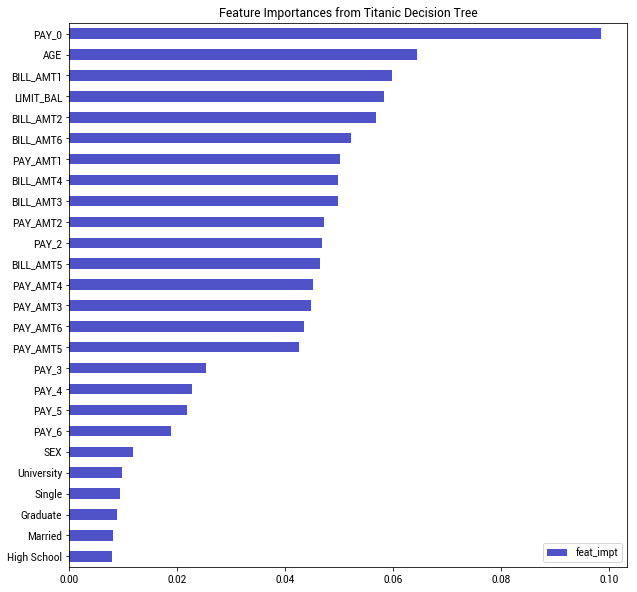

In [193]:
plot_feat_imp(dt, X_train)

In [194]:
#Fit Logistic Regression Model

logit_model=sm.Logit(Y_train,X_train)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.466427
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default payment next month   No. Observations:                24000
Model:                                  Logit   Df Residuals:                    23974
Method:                                   MLE   Df Model:                           25
Date:                        Sat, 29 Sep 2018   Pseudo R-squ.:                  0.1184
Time:                                03:04:37   Log-Likelihood:                -11194.
converged:                               True   LL-Null:                       -12697.
                                                LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
LIMIT_BAL   -6.264e-07   1.75e-07     -3.573      0.000    -9.7e-07   -2.83e-07
SEX            -0.1973      0.033     -6.059      0.000      -0.261      -0.133
AGE            -0.0007      0.002     -0.379      0.705      -0.004       0.003
PAY_0           0.5625      0.020     28.504      0.000       0.524       0.601
PAY_2           0.0747      0.023      3.312      0.001       0.030       0.119
PAY_3           0.0846      0.025      3.367      0.001       0.035       0.134
PAY_4           0.0274      0.028      0.990      0.322      -0.027       0.082
PAY_5           0.0217      0.030      0.722      0.470      -0.037       0.081
PAY_6           0.0200      0.025      0.809      0.418      -0.028       0.068
BILL_AMT1   -5.644e-06   1.25e-06     -4.526      0.000   -8.09e-06    -3.2e-06
BILL_AMT2    2.414e-06   1.65e-06      1.460      0.144   -8.28e-07    5.65e-06
BILL_AMT3    1.085e-07   1.51e-06      0.072      0.943   -2.85e-06    3.07e-06
BILL_AMT4    8.348e-07   1.54e-06      0.541      0.588   -2.19e-06    3.86e-06
BILL_AMT5    1.596e-06   1.67e-06      0.954      0.340   -1.68e-06    4.87e-06
BILL_AMT6   -3.158e-07    1.3e-06     -0.244      0.807   -2.86e-06    2.22e-06
PAY_AMT1    -1.461e-05   2.63e-06     -5.552      0.000   -1.98e-05   -9.45e-06
PAY_AMT2    -8.075e-06   2.22e-06     -3.636      0.000   -1.24e-05   -3.72e-06
PAY_AMT3    -7.744e-06   2.27e-06     -3.412      0.001   -1.22e-05    -3.3e-06
PAY_AMT4     -4.87e-06   1.99e-06     -2.449      0.014   -8.77e-06   -9.72e-07
PAY_AMT5     -1.68e-06   1.91e-06     -0.881      0.378   -5.42e-06    2.06e-06
PAY_AMT6    -1.404e-06    1.4e-06     -1.000      0.317   -4.16e-06    1.35e-06
Graduate        0.0530      0.113      0.470      0.638      -0.168       0.274
High School    -0.0533      0.117     -0.455      0.649      -0.283       0.176
University     -0.0532      0.111     -0.482      0.630      -0.270       0.163
Married        -0.5186      0.108     -4.809      0.000      -0.730      -0.307
Single         -0.7851      0.104     -7.559      0.000      -0.989      -0.581
===============================================================================
"""

In [207]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data')
df.columns = cols

In [205]:
cols = ['word_freq_make',
'word_freq_address',
'word_freq_all',
'word_freq_3d',
'word_freq_our',
'word_freq_over',
'word_freq_remove',
'word_freq_internet',
'word_freq_order',
'word_freq_mail',
'word_freq_receive',
'word_freq_will',
'word_freq_people',
'word_freq_report',
'word_freq_addresses',
'word_freq_free',
'word_freq_business',
'word_freq_email',
'word_freq_you',
'word_freq_credit',
'word_freq_your',
'word_freq_font',
'word_freq_000',
'word_freq_money',
'word_freq_hp',
'word_freq_hpl',
'word_freq_george',
'word_freq_650',
'word_freq_lab',
'word_freq_labs',
'word_freq_telnet',
'word_freq_857',
'word_freq_data',
'word_freq_415',
'word_freq_85',
'word_freq_technology',
'word_freq_1999',
'word_freq_parts',
'word_freq_pm',
'word_freq_direct',
'word_freq_cs',
'word_freq_meeting',
'word_freq_original',
'word_freq_project',
'word_freq_re',
'word_freq_edu',
'word_freq_table',
'word_freq_conference',
'char_freq_;',
'char_freq_(',
'char_freq_[',
'char_freq_!',
'char_freq_$',
'char_freq_#',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total',
'spam']

In [209]:
df.to_csv('../datasets/spam_detection.csv')